<a href="https://colab.research.google.com/github/AhmedAbdallah142/Computer-Vision/blob/main/Stereo_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
Left_Images = {}
Right_Images = {}
Left_Images[0]=cv2.imread("l1.png",cv2.IMREAD_GRAYSCALE)
Left_Images[1]=cv2.imread("l2.png",cv2.IMREAD_GRAYSCALE)
Left_Images[2]=cv2.imread("l3.png",cv2.IMREAD_GRAYSCALE)
Right_Images[0]=cv2.imread("r1.png",cv2.IMREAD_GRAYSCALE)
Right_Images[1]=cv2.imread("r2.png",cv2.IMREAD_GRAYSCALE)
Right_Images[2]=cv2.imread("r3.png",cv2.IMREAD_GRAYSCALE)

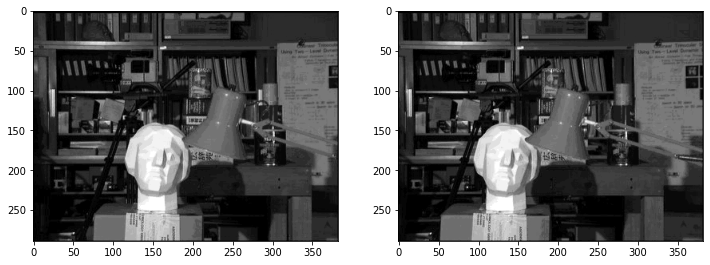

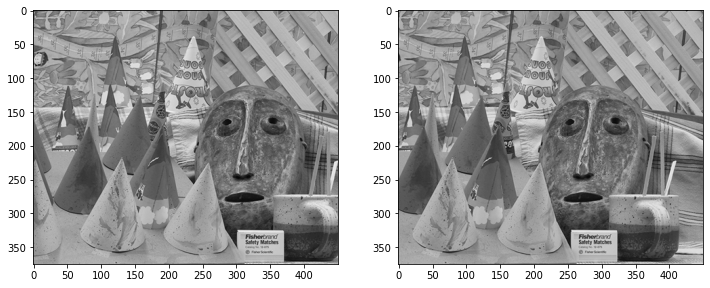

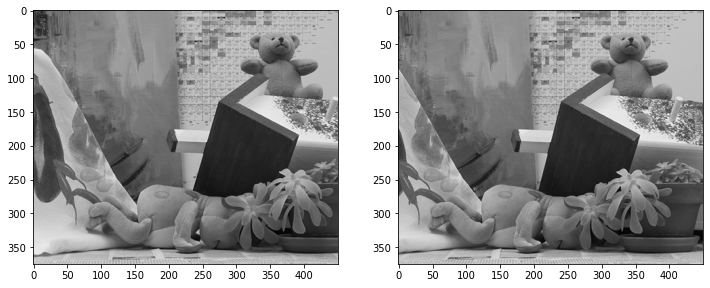

In [ ]:
for i in range(3):
    plt.figure(figsize = (12, 12))
    plt.subplot(1,2,1), plt.imshow( Left_Images[i], cmap='gray' )
    plt.subplot(1,2,2), plt.imshow( Right_Images[i], cmap='gray')

## Block Matching


In [ ]:
def SAD(left, right):
    return np.sum(abs(np.subtract(left, right)))

def SSD(left, right):
    return np.sum(np.square(abs(np.subtract(left, right))))

In [ ]:
def blockMatching(img_left, img_right, window_size, metric):
    rows = img_left.shape[0]
    columns = img_left.shape[1]

    disparity = np.zeros((rows, columns))
    window_half = window_size // 2

    for i in range(window_half, rows-window_half):
        for j in range(window_half, columns-window_half):
            bestMatch = sys.maxsize
            left = img_left[ (i-window_half) : (i+window_half+1) , (j-window_half) : (j+window_half+1) ]
            for k in range (window_half , columns-window_half):
                if(bestMatch == 0):
                    break

                right = img_right[ (i-window_half) : (i+window_half+1) , (k-window_half) : (k+window_half+1) ]

                if metric == "SAD":
                    cost = SAD(left, right)
                elif metric == "SSD":
                    cost = SSD(left, right)

                if(cost < bestMatch):
                    bestMatch = cost
                    index = k

            
            disparity[i][j] = abs(index-j)*255 / int(columns/8)

    return disparity

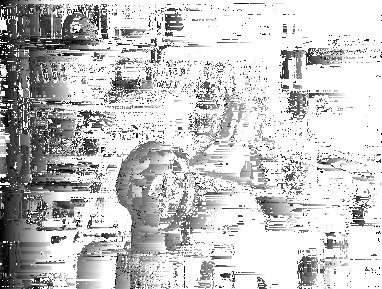

In [ ]:
SAD_WINDOW_1 = blockMatching(Left_Images[0], Right_Images[0], 1, "SAD")
cv2_imshow(SAD_WINDOW_1)

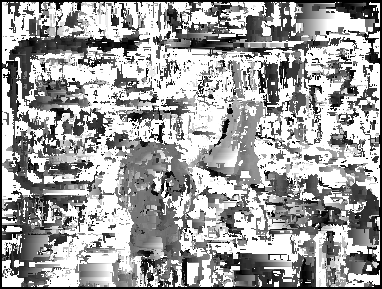

In [ ]:
SAD_WINDOW_5 = blockMatching(Left_Images[0], Right_Images[0], 5, "SAD")
cv2_imshow(SAD_WINDOW_5)

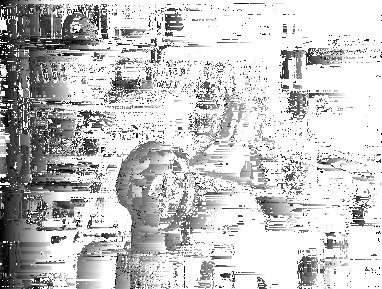

In [ ]:
SAD_WINDOW_9 = blockMatching(Left_Images[0], Right_Images[0], 9, "SAD")
cv2_imshow(SAD_WINDOW_9)

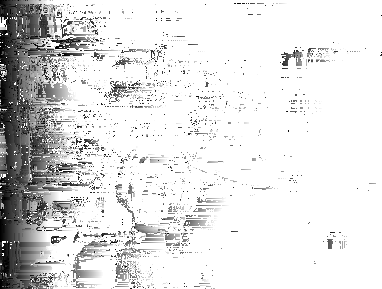

In [ ]:
SSD_WINDOW_1 = blockMatching(Left_Images[0], Right_Images[0], 1, "SSD")
cv2_imshow(SSD_WINDOW_1)

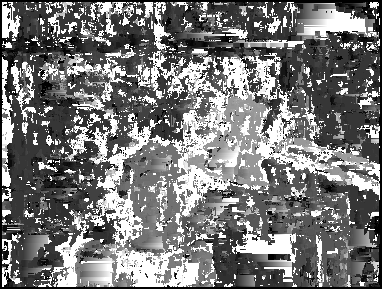

In [ ]:
SSD_WINDOW_5 = blockMatching(Left_Images[0], Right_Images[0], 5, "SSD")
cv2_imshow(SSD_WINDOW_5)

In [ ]:
SSD_WINDOW_9 = blockMatching(Left_Images[0], Right_Images[0], 9, "SSD")
cv2_imshow(SSD_WINDOW_9)

## Dynamic Programming


In [ ]:
σ = 2
c0 = 1
def cost(left,right):
  return np.square(np.subtract(left, right)/σ)

In [ ]:
def matchKeepingOrder(img_left, img_right):
  rows = img_left.shape[0]
  columns = img_left.shape[1]
  disparity = np.zeros((rows, columns),dtype = np.float128)
  for row in range (rows):
    costs = np.full((columns + 1, columns + 1), np.inf)
    costs[1][1] = cost(img_left[row][0], img_right[row][0])
    for i in range(1,columns + 1):
      for j in range (1,columns + 1):
        if i == 1 and j == 1 :
          continue
        costs[i][j] = min(costs[i-1][j-1] + cost(img_left[row][i - 1], img_right[row][j - 1]), costs[i-1][j] + c0, costs[i][j-1] + c0)
    map = np.zeros((columns, columns))
    i = j = columns
    while (i > 0 and j > 0):
      if (costs[i][j] == costs[i - 1][j - 1] + cost(img_left[row][i - 1], img_right[row][j - 1])):
        disparity[row][i - 1] = abs(i - j)
        map[i-2][j-2] = 1
        i -= 1
        j -= 1
      elif (costs[i][j] == costs[i - 1][j] + c0):
        map[i-2][j-1] = 1
        i -= 1
      else :
        map[i-1][j-2] = 1
        j -= 1
  repeat = 10
  leftLineVisualization = np.concatenate((np.repeat([img_left[rows - 1]], repeat, axis = 0).T, map*255), axis = 1)
  rightLineVisualization = np.concatenate((np.repeat([np.zeros(repeat)], repeat, axis = 0), np.repeat([img_right[rows - 1]], repeat, axis = 0)),axis = 1)
  return disparity * 255 / np.max(disparity), np.concatenate((leftLineVisualization, rightLineVisualization))

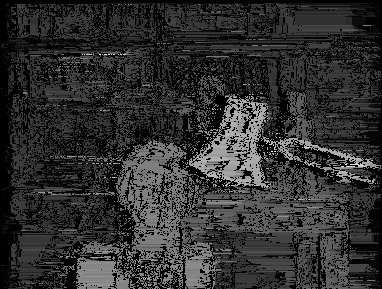

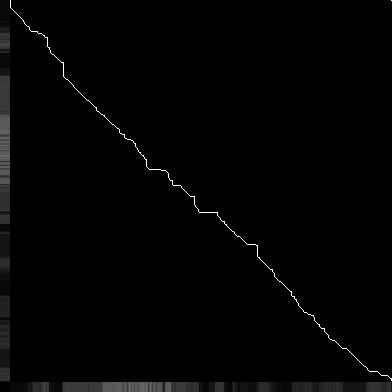

In [ ]:
disparityImage, lastRowVisualiztion = matchKeepingOrder(Left_Images[0], Right_Images[0])
cv2_imshow(disparityImage)
cv2_imshow(lastRowVisualiztion)

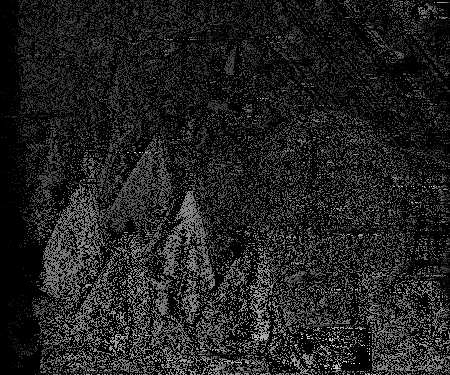

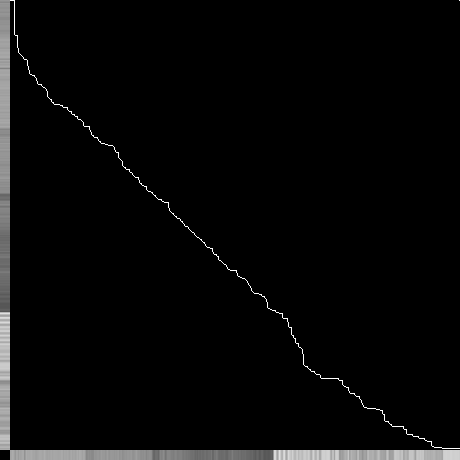

In [ ]:
disparityImage, lastRowVisualiztion = matchKeepingOrder(Left_Images[1], Right_Images[1])
cv2_imshow(disparityImage)
cv2_imshow(lastRowVisualiztion)

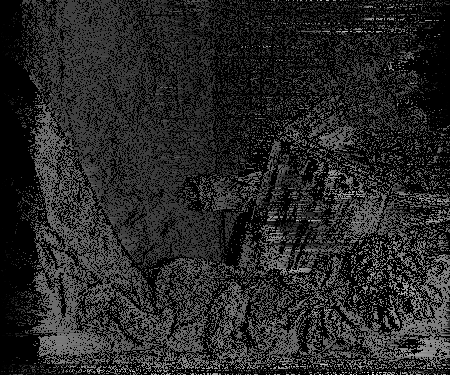

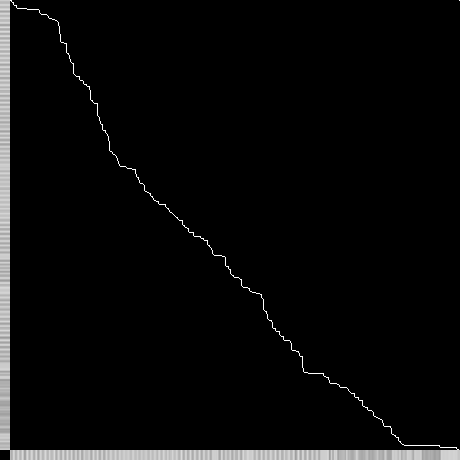

In [ ]:
disparityImage, lastRowVisualiztion = matchKeepingOrder(Left_Images[2], Right_Images[2])
cv2_imshow(disparityImage)
cv2_imshow(lastRowVisualiztion)